# IBM Employees Analytics: Attrition and Performance

## Introduction


As an HR manager, you want to retain your best employees within the company, but you can't constantly follow-up with each and every one of them, as that would be very time and resource consuming and even if you do, it's not guarantee that you recognize an employee turnover early enough to prevent it. Instead you might relay on an HR analytic solution to understand what are the most frequent situations why an employee decides to leave and build an early warning prediction system, so that you can do something to address it.  

In this notebook we will explore a dataset from IBM. It contains approximately 1500 employee observations with 35 features including performance rating, monthly income, education, job satisfaction, and more.  
The goal is to understand the reasons behind employee turnover and to come up with a model to classify an employee's risk of attrition.

The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.


In [2]:
# Import the necessary modules for analysis and viz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# set notebook environment
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

%precision %.3f
pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = 10,8

pd.set_option('display.width', 100, 
              'display.max_rows', 81,
              'display.max_columns', None
             )


# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

In [3]:
# Load the dataset
df = pd.read_csv("../Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Get to Know Your Data


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
print(f"The dataset contains {df.shape[0]} samples and "
      f"{df.shape[1]} features")

The dataset contains 1470 samples and 35 features


The cleaning of the data is usually very time consuming and takes around 80% of the whole process. This dataset is, however, clean and without missing values.

In [6]:
 df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [7]:
print ("\nUnique values :  \n", df.nunique())


Unique values :  
 Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear  

In [8]:
df.describe(include='object',)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


## Data Wrangling

Let's clean our data a bit. We start by deleting all features with only one variable.

In [9]:
# filter variables with one unique value
delete = []
for col in df.columns:
    if df[col].nunique() == 1:
        delete += [col]

In [10]:
df.drop(delete, axis=1, inplace=True);

We have 1470 unique employees and we don't really care about the employees ID number since it contains no valuable information. So the index  will do the job to identify each employee individually.

In [11]:
df.drop(['EmployeeNumber'], axis=1, inplace=True)

Now we update the `object` data types to `category` to save more memory and simplify further processing.

In [12]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

In [13]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

Now there are only 31 variables left, including our target variable `Attrition`, and 279 KB of memory usage, that is 75% less memory usage compared to the original dataset.

In [20]:
df.describe().loc[['min', 'max']]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
max,60.00,"1,499.00",29.00,5.00,4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


There is more we could do to reduce the memory usage. For instance, many features can be converted from `int64` to `int8`.

## Exploratory Data Analysis

Once the data has been cleaned and trimmed, we can move on to explore it. EDA is used to deepen your insight into the dataset. It helps to uncover the underlying structure, detect outliers and anomalies, and rank features based on correlation and causality.  
I usually start by looking at each variable independently and try to find interesting behavior to further investigate as well as hypotheses to explore.

So let's start first start by visualizing the overall employee attrition rate for the entire dataset. 

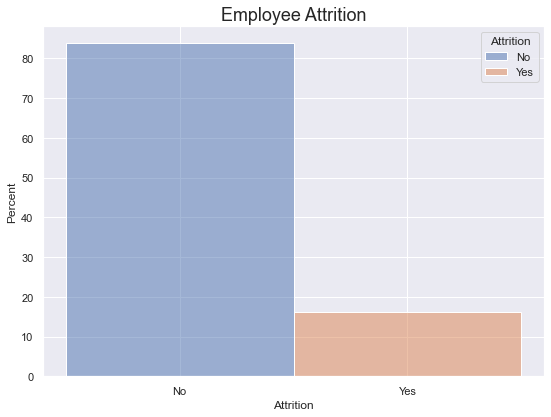

In [86]:
sns.set(style='darkgrid', context='notebook', rc={"figure.figsize":(8, 6)})

ax = sns.histplot(data=df, x='Attrition', hue='Attrition', stat='percent')
plt.title('Employee Churn Rate', fontdict={'fontsize':18});


Around 18% all employees quit their job, which is a lot given that to replace an employee earning a \\$35,000 yearly salary, costs a company between \\$17,500 and can take between six to nine months.

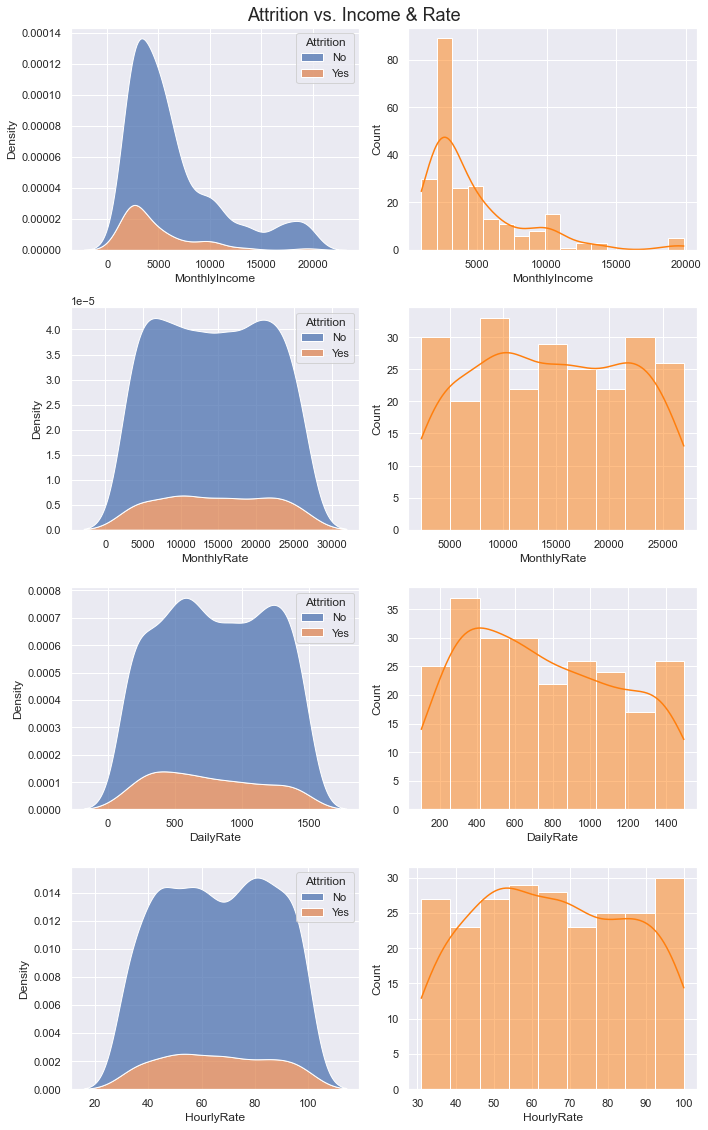

In [69]:
sns.set(style='darkgrid', context='notebook', rc={"figure.figsize":(10, 16)})

# create a figure with 4 axes 
fig, ax = plt.subplots(nrows=4, ncols=2)
var_list = ['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'HourlyRate']

for i, var in enumerate(var_list):
    sns.histplot(data=df[df['Attrition']=='Yes'], x=var, 
                 color=['tab:orange'],
                 kde=True, ax=ax[i, 1])
    sns.kdeplot(data=df, x=var, hue='Attrition', multiple='stack', ax=ax[i, 0])

plt.suptitle('Attrition vs. Income & Rate', fontsize=18)
plt.tight_layout();